<a href="https://colab.research.google.com/github/Pranjalidamdhar/Learn-ML/blob/main/QualityDetectionOfWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # data visualization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data collection

In [6]:
# loading the dataset to a pandas dataframes
wine_dataset = pd.read_csv('/content/WineQT.csv')

In [7]:
#numberof rows and coloumn
wine_dataset.shape

(1143, 13)

In [8]:
# first 5 rows of dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
# checking for any mising value
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and visualization

In [10]:
#statical measures of the dataset
wine_dataset.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


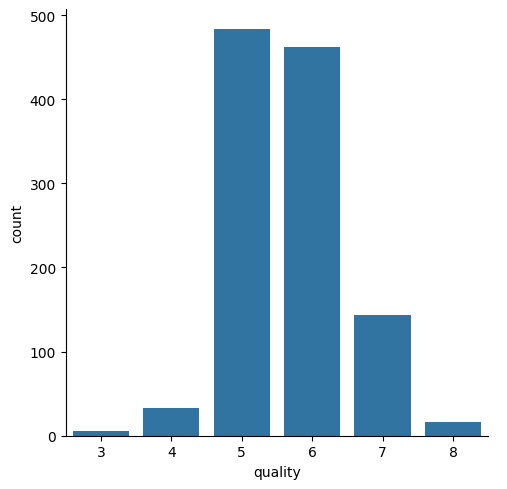

In [11]:
#number of values for each quality
sns.catplot(x='quality',data=wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

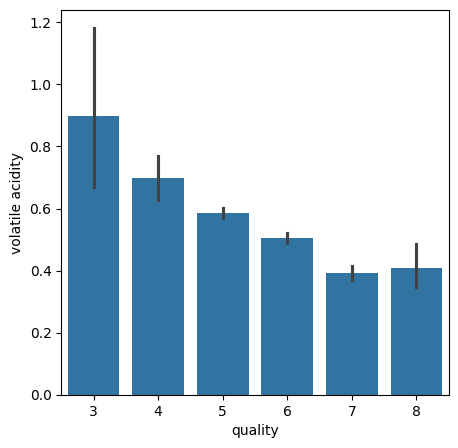

In [13]:
# volatitle acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

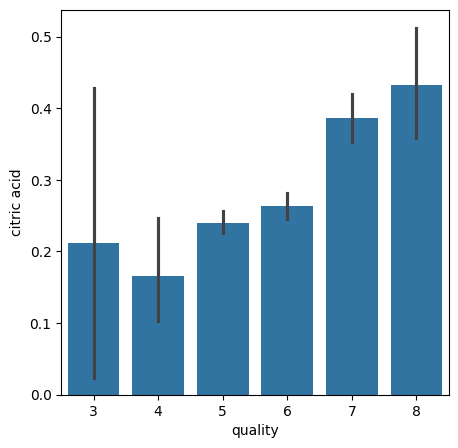

In [14]:
# Cirtic acid acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data = wine_dataset)

correlation

In [15]:
correlation = wine_dataset.corr()

1. positive correlation  :like directliy proportional
2. Negative correlation  :like inversly proportional

<Axes: >

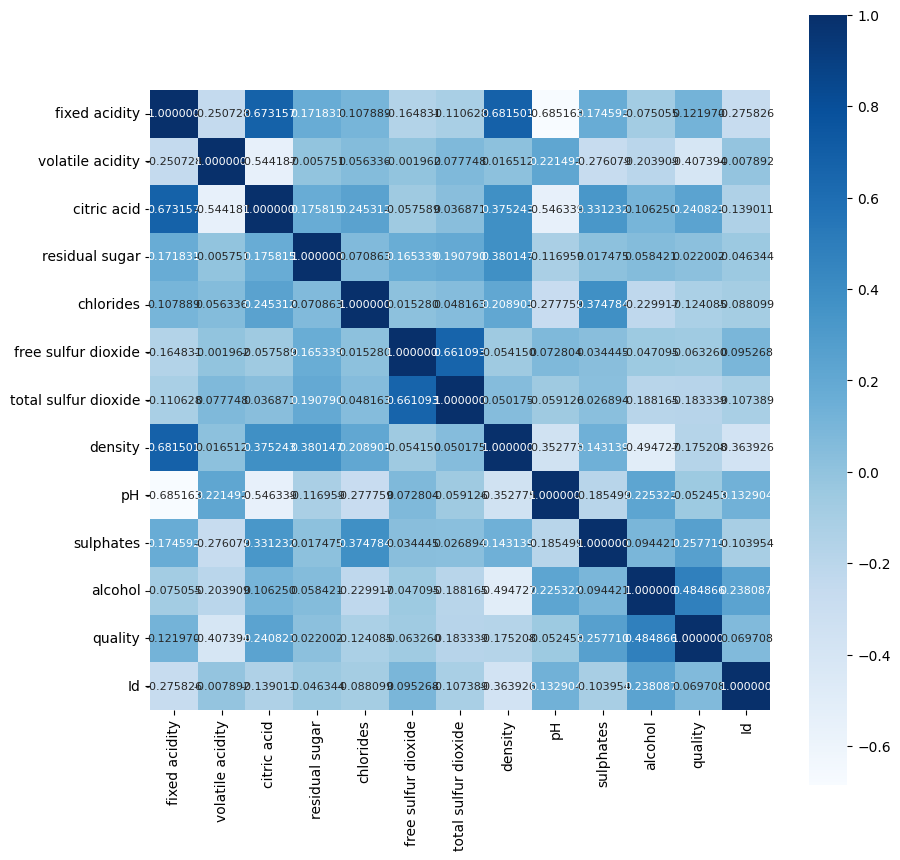

In [16]:
# construting the heatmap to understand the correlation between two coloumn
plt.figure(figsize=(10,10))
sns.heatmap(correlation ,cbar=True ,square=True,fmt='1f',annot = True,annot_kws={'size':8},cmap ='Blues')

Data preprocessing

In [17]:
# seprate data in variable
X = wine_dataset.drop('quality',axis=1)

In [18]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  ...    pH  sulphates  alcohol    Id
0               7.4             0.700         0.00             1.9  ...  3.51       0.56      9.4     0
1               7.8             0.880         0.00             2.6  ...  3.20       0.68      9.8     1
2               7.8             0.760         0.04             2.3  ...  3.26       0.65      9.8     2
3              11.2             0.280         0.56             1.9  ...  3.16       0.58      9.8     3
4               7.4             0.700         0.00             1.9  ...  3.51       0.56      9.4     4
...             ...               ...          ...             ...  ...   ...        ...      ...   ...
1138            6.3             0.510         0.13             2.3  ...  3.42       0.75     11.0  1592
1139            6.8             0.620         0.08             1.9  ...  3.42       0.82      9.5  1593
1140            6.2             0.600         0.08             2

Label Binarization

In [19]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [20]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Train and test split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1143,) (914,) (229,)


Model traning:
Random forest classification

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Evalution of model

BY Accuracy score value


In [25]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [26]:
print('Accuracy :',test_data_accuracy)

Accuracy : 0.9082969432314411


Bulding predictive system

In [29]:
input_data = (7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,2)

#changing the input data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the data as we are predicting label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good quality')

else:
  print('Bad quality')


[0]
Bad quality


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
